In [1]:
import pandas as pd

df = pd.read_csv('data/preprocessed_data.csv')

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
Y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
class LinearRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, x, y):

        x = np.array(x)
        y = np.array(y)

        X_b = np.c_[np.ones((x.shape[0], 1)), x]

        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

        self.intercept = theta_best[0]
        self.coefficients = theta_best[1:]

    def predict(self, x):
        x = np.array(x)
        X_b = np.c_[np.ones((x.shape[0], 1)), x]

        return X_b.dot(np.r_[self.intercept, self.coefficients])

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

In [20]:
y_pred = model.predict(X_test)

In [21]:
from model_analysis import *

evaluation_metrics(y_test, y_pred)

Ortalama Mutlak Hata 0.28115389427342885
Ortalama Karesel Hata: 0.15071327689869296
Kök Ortalama Karesel Hata: 0.3882180790466783
R² Skor: 0.7800153616400348


In [22]:
pd.DataFrame(np.exp(y_pred), np.exp(y_test))

,0
price,
540001.0,523144.955596
160001.0,221734.160018
334001.0,325929.166680
399001.0,460980.125099
284901.0,211169.014130
...,...
154901.0,81064.144151
23001.0,71205.955174
359901.0,411450.875756


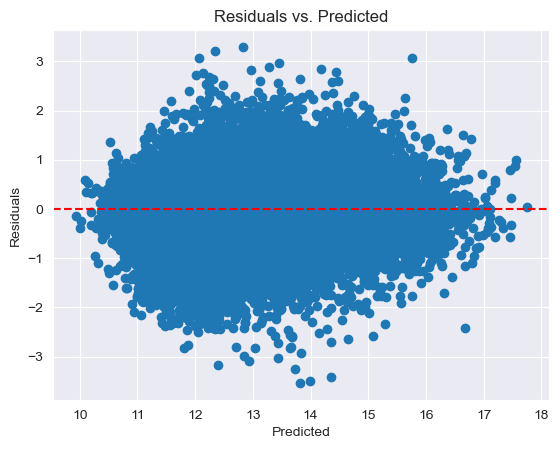

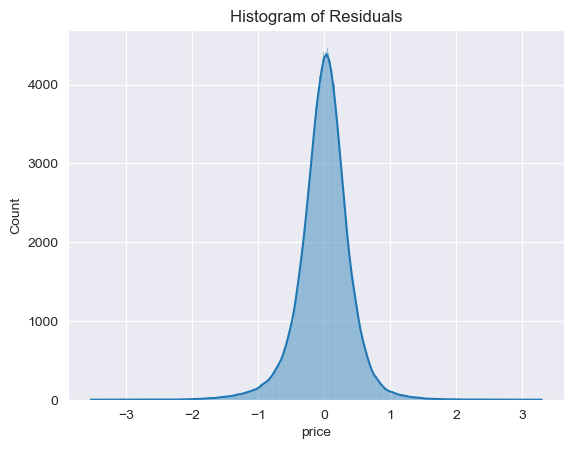

In [23]:
residual_analysis(y_test, y_pred)